# Goal: Read in output from AstroImageJ

and plot an HR diagram

* loaded g and r stacked images of M39
  * ZP for both is 17
  


In [38]:
from astropy.table import Table
import numpy as np
from matplotlib import pyplot as plt

In [111]:
inputFile = "M39-measurements-ap-12pix.csv"
photTab = Table.read(inputFile)
photTab

col0,Label,slice,Saturated,J.D.-2400000,JD_UTC,JD_SOBS,HJD_UTC,BJD_TDB,AIRMASS,ALT_OBJ,CCD-TEMP,EXPTIME,RAOBJ2K,DECOBJ2K,FWHM_Mean,Source_Radius,FWHM_Mult,Source_Rad(base),Sky_Rad(min),Sky_Rad(max),rel_flux_T1,rel_flux_C2,rel_flux_C3,rel_flux_C4,rel_flux_C5,rel_flux_C6,rel_flux_C7,rel_flux_C8,rel_flux_C9,rel_flux_C10,rel_flux_C11,rel_flux_C12,rel_flux_C13,rel_flux_C14,rel_flux_C15,rel_flux_C16,rel_flux_C17,rel_flux_C18,rel_flux_C19,rel_flux_C20,rel_flux_C21,rel_flux_C22,rel_flux_C23,rel_flux_C24,rel_flux_C25,rel_flux_C26,rel_flux_C27,rel_flux_C28,rel_flux_C29,rel_flux_C30,rel_flux_C31,rel_flux_C32,rel_flux_C33,rel_flux_C34,rel_flux_C35,rel_flux_err_T1,rel_flux_err_C2,rel_flux_err_C3,rel_flux_err_C4,rel_flux_err_C5,rel_flux_err_C6,rel_flux_err_C7,rel_flux_err_C8,rel_flux_err_C9,rel_flux_err_C10,rel_flux_err_C11,rel_flux_err_C12,rel_flux_err_C13,rel_flux_err_C14,rel_flux_err_C15,rel_flux_err_C16,rel_flux_err_C17,rel_flux_err_C18,rel_flux_err_C19,rel_flux_err_C20,rel_flux_err_C21,rel_flux_err_C22,rel_flux_err_C23,rel_flux_err_C24,rel_flux_err_C25,rel_flux_err_C26,rel_flux_err_C27,rel_flux_err_C28,rel_flux_err_C29,rel_flux_err_C30,rel_flux_err_C31,rel_flux_err_C32,rel_flux_err_C33,rel_flux_err_C34,rel_flux_err_C35,rel_flux_SNR_T1,rel_flux_SNR_C2,rel_flux_SNR_C3,rel_flux_SNR_C4,rel_flux_SNR_C5,rel_flux_SNR_C6,rel_flux_SNR_C7,rel_flux_SNR_C8,rel_flux_SNR_C9,rel_flux_SNR_C10,rel_flux_SNR_C11,rel_flux_SNR_C12,rel_flux_SNR_C13,rel_flux_SNR_C14,rel_flux_SNR_C15,rel_flux_SNR_C16,rel_flux_SNR_C17,rel_flux_SNR_C18,rel_flux_SNR_C19,rel_flux_SNR_C20,rel_flux_SNR_C21,rel_flux_SNR_C22,rel_flux_SNR_C23,rel_flux_SNR_C24,rel_flux_SNR_C25,rel_flux_SNR_C26,rel_flux_SNR_C27,rel_flux_SNR_C28,rel_flux_SNR_C29,rel_flux_SNR_C30,rel_flux_SNR_C31,rel_flux_SNR_C32,rel_flux_SNR_C33,rel_flux_SNR_C34,rel_flux_SNR_C35,tot_C_cnts,tot_C_err,X(IJ)_T1,Y(IJ)_T1,X(FITS)_T1,Y(FITS)_T1,RA_T1,DEC_T1,Source-Sky_T1,N_Src_Pixels_T1,Source_Error_T1,Source_SNR_T1,Peak_T1,Mean_T1,Sky/Pixel_T1,N_Sky_Pixels_T1,FWHM_T1,Width_T1,X-Width_T1,Y-Width_T1,Angle_T1,Roundness_T1,X(IJ)_C2,Y(IJ)_C2,X(FITS)_C2,Y(FITS)_C2,RA_C2,DEC_C2,Source-Sky_C2,Source_Error_C2,Source_SNR_C2,Peak_C2,Mean_C2,Sky/Pixel_C2,FWHM_C2,Width_C2,X-Width_C2,Y-Width_C2,Angle_C2,Roundness_C2,X(IJ)_C3,Y(IJ)_C3,X(FITS)_C3,Y(FITS)_C3,RA_C3,DEC_C3,Source-Sky_C3,Source_Error_C3,Source_SNR_C3,Peak_C3,Mean_C3,Sky/Pixel_C3,FWHM_C3,Width_C3,X-Width_C3,Y-Width_C3,Angle_C3,Roundness_C3,X(IJ)_C4,Y(IJ)_C4,X(FITS)_C4,Y(FITS)_C4,RA_C4,DEC_C4,Source-Sky_C4,Source_Error_C4,Source_SNR_C4,Peak_C4,Mean_C4,Sky/Pixel_C4,FWHM_C4,Width_C4,X-Width_C4,Y-Width_C4,Angle_C4,Roundness_C4,X(IJ)_C5,Y(IJ)_C5,X(FITS)_C5,Y(FITS)_C5,RA_C5,DEC_C5,Source-Sky_C5,Source_Error_C5,Source_SNR_C5,Peak_C5,Mean_C5,Sky/Pixel_C5,FWHM_C5,Width_C5,X-Width_C5,Y-Width_C5,Angle_C5,Roundness_C5,X(IJ)_C6,Y(IJ)_C6,X(FITS)_C6,Y(FITS)_C6,RA_C6,DEC_C6,Source-Sky_C6,Source_Error_C6,Source_SNR_C6,Peak_C6,Mean_C6,Sky/Pixel_C6,FWHM_C6,Width_C6,X-Width_C6,Y-Width_C6,Angle_C6,Roundness_C6,X(IJ)_C7,Y(IJ)_C7,X(FITS)_C7,Y(FITS)_C7,RA_C7,DEC_C7,Source-Sky_C7,Source_Error_C7,Source_SNR_C7,Peak_C7,Mean_C7,Sky/Pixel_C7,FWHM_C7,Width_C7,X-Width_C7,Y-Width_C7,Angle_C7,Roundness_C7,X(IJ)_C8,Y(IJ)_C8,X(FITS)_C8,Y(FITS)_C8,RA_C8,DEC_C8,Source-Sky_C8,Source_Error_C8,Source_SNR_C8,Peak_C8,Mean_C8,Sky/Pixel_C8,FWHM_C8,Width_C8,X-Width_C8,Y-Width_C8,Angle_C8,Roundness_C8,X(IJ)_C9,Y(IJ)_C9,X(FITS)_C9,Y(FITS)_C9,RA_C9,DEC_C9,Source-Sky_C9,Source_Error_C9,Source_SNR_C9,Peak_C9,Mean_C9,Sky/Pixel_C9,FWHM_C9,Width_C9,X-Width_C9,Y-Width_C9,Angle_C9,Roundness_C9,X(IJ)_C10,Y(IJ)_C10,X(FITS)_C10,Y(FITS)_C10,RA_C10,DEC_C10,Source-Sky_C10,Source_Error_C10,Source_SNR_C10,Peak_C10,Mean_C10,Sky/Pixel_C10,FWHM_C10,Width_C10,X-Width_C10,Y-Width_C10,Angle_C10,Roundness_C10,X(IJ)_C11,Y(IJ)_C11,X(FITS)_C11,Y(FITS)_C11,RA_C11,DEC_C11,Source-Sky_C11,Source_Error_C11,Source_SNR_C11,Peak_C11,Mean_C11,Sky/Pixel_C11,FWHM_C11,Width_C11,X-Width_C11,Y-Width_C11,Angle_C11,Roundness_C11,X(IJ)_C12,Y(IJ)_C12,X(FITS)_C12,Y(FITS

In [26]:
goodcols = []
for i,c in enumerate(photTab.colnames):
    if 'Source-Sky' in c:
        goodcols.append(i)

In [36]:
gflux = []
rflux = []
for i in goodcols:
    gflux.append(photTab[0][i])
    rflux.append(photTab[1][i])

In [37]:
gmag = 17 - 2.5*np.log10(gflux)
rmag = 17 - 2.5*np.log10(rflux)

Text(0, 0.5, 'g')

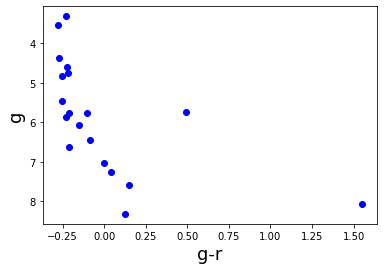

In [41]:
plt.figure()
plt.plot(gmag-rmag,gmag,'bo')
plt.gca().invert_yaxis()
plt.xlabel('g-r',fontsize=18)
plt.ylabel('g',fontsize=18)

In [44]:
photTab = Table.read(inputFile)
gflux = []
rflux = []
goodcols = []
for i,c in enumerate(photTab.colnames):
    if 'Source-Sky' in c:
        goodcols.append(i)
for i in goodcols:
    gflux.append(photTab[0][i])
    rflux.append(photTab[1][i])
gmag = 17 - 2.5*np.log10(gflux)
rmag = 17 - 2.5*np.log10(rflux)

<ipython-input-44-eca080c662dd>:11: RuntimeWarning: invalid value encountered in log10
  gmag = 17 - 2.5*np.log10(gflux)
<ipython-input-44-eca080c662dd>:12: RuntimeWarning: invalid value encountered in log10
  rmag = 17 - 2.5*np.log10(rflux)


Text(0, 0.5, 'g')

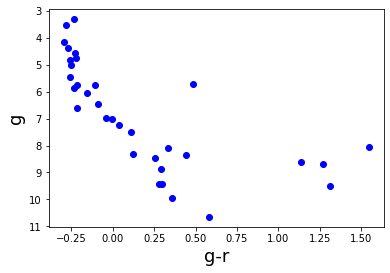

In [45]:
plt.figure()
plt.plot(gmag-rmag,gmag,'bo')
plt.gca().invert_yaxis()
plt.xlabel('g-r',fontsize=18)
plt.ylabel('g magnitude',fontsize=18)
plt.title('Color-Magnitude Diagram for M39')

# Where would the sun be?

$$g-r    =    1.02*(B-V)   - 0.22 $$

From wikipedia, the Sun has
* $B = 5.48$
* $V = 4.83$
* $M_g = 4.68$

So $B-V = 0.65$

Then 

$$g-r = 1.02*(B-V) - 0.22$$

Distance Modulus:

$$ m - M = 5 log d - 5 $$


### References
* Transformation between Johnson and SDSS
http://www.sdss3.org/dr8/algorithms/sdssUBVRITransform.php

* Dartmouth isochrones
http://stellar.dartmouth.edu/models/isolf_new.html


In [112]:
MgSun = 4.68
grSun = 1.02*(5.48-4.83) - .22
print(grSun)

0.4430000000000004


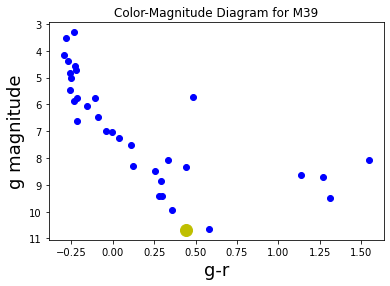

In [113]:
plt.figure()
plt.plot(gmag-rmag,gmag,'bo')
plt.gca().invert_yaxis()
plt.xlabel('g-r',fontsize=18)
plt.ylabel('g magnitude',fontsize=18)
plt.title('Color-Magnitude Diagram for M39')

# plot the sun, solving for distance modulus

xSun = grSun
goffset = 6
ySun = MgSun + goffset
plt.plot(xSun,ySun,'yo',markersize=12)

In [114]:
# this cell reads in the isochrone file so we can plot it with our data
isodat = Table.read('dartmouth_isochrone_1_3_5_10.iso',format='ascii')
isog = isodat['col7']
isor = isodat['col']
isogr = isog - isor

KeyError: 'col'

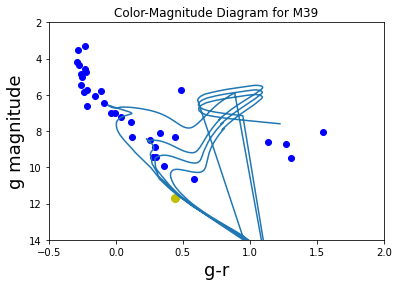

In [117]:
plt.figure()
plt.plot(gmag-rmag,gmag,'bo')

plt.xlabel('g-r',fontsize=18)
plt.ylabel('g magnitude',fontsize=18)
plt.title('Color-Magnitude Diagram for M39')

# plot the sun, solving for distance modulus

xSun = grSun
goffset = 7
ySun = MgSun + goffset
plt.plot(xSun,ySun,'yo',markersize=8)


# plot dartmouth isochrones

plt.plot(isogr,isog+6)
plt.axis([-.5,2,2,14])
plt.gca().invert_yaxis()

In [78]:
def getDistanceFromDM(DM):
    #𝑚−𝑀=5𝑙𝑜𝑔𝑑−5
    d=10.**((DM+5)/5)
    print('distance in pc = {:.3f}'.format(d))
    print('distance in ly = {:.3f}'.format(d*3.26))
    return d

In [81]:
getDistanceFromDM(7)

distance in pc = 251.189
distance in ly = 818.875


251.18864315095797